In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../datasets/weight_height.csv", encoding="euc-kr")
df

,고유식별번호(ID),최종가중치,학교고유번호(ID),도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,...,키,몸무게,혈당식전(mgdl),총콜레스테롤(mgdl),간기능(AST)단위(UL),간기능(ALT)단위(UL),혈색소(gdl),간염검사,수축기,이완기
0,Aa011남10101,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,125.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,77.0,58.0
1,Aa011남10102,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,124.3,25.4,NaN,NaN,NaN,NaN,NaN,NaN,83.0,51.0
2,Aa011남10103,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,119.2,23.5,NaN,NaN,NaN,NaN,NaN,NaN,103.0,65.0
3,Aa011남10104,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,115.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,92.0,66.0
4,Aa011남10105,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,120.0,33.5,NaN,NaN,NaN,NaN,NaN,NaN,102.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9681,Ac343남30106,25.790895,Ac34,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,세종과학고등학교,...,176.1,50.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9682,Ac343남30107,25.790895,Ac34,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,세종과학고등학교,...,174.1,88.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9683,Ac343남30108,25.790895,Ac34,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,세종과학고등학교,...,169.5,63.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9684,Ac343여30101,23.325794,Ac34,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,세종과학고등학교,...,159.2,52.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 몸무게와 키를 학습시키자
# 몸무게를 통해 키를 예측하자

In [5]:
df.columns

Index(['고유식별번호(ID)', '최종가중치', '학교고유번호(ID)', '도시규모', '도시규모별분석용', '학년도', '광역시도',
       '시도별', '학교급별', '학교명', '공학여부', '학년', '반', '성별', '건강검진일', '키', '몸무게',
       '혈당식전(mgdl)', '총콜레스테롤(mgdl)', '간기능(AST)단위(UL)', '간기능(ALT)단위(UL)',
       '혈색소(gdl)', '간염검사', '수축기', '이완기'],
      dtype='object')

In [6]:
df = df[["학교명", "학년", "성별", "키", "몸무게"]]
df

,학교명,학년,성별,키,몸무게
0,서울대도초등학교,1,남,125.8,27.3
1,서울대도초등학교,1,남,124.3,25.4
2,서울대도초등학교,1,남,119.2,23.5
3,서울대도초등학교,1,남,115.0,20.0
4,서울대도초등학교,1,남,120.0,33.5
...,...,...,...,...,...
9681,세종과학고등학교,3,남,176.1,50.4
9682,세종과학고등학교,3,남,174.1,88.8
9683,세종과학고등학교,3,남,169.5,63.2
9684,세종과학고등학교,3,여,159.2,52.9


In [7]:
df["grade"] = list(map(lambda x: 0 if x[-4:] == "초등학교" 
                      else 6 if x[-3:] == "중학교"
                      else 9, df["학교명"])) + df["학년"]
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_12276\4232085750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["grade"] = list(map(lambda x: 0 if x[-4:] == "초등학교"


,학교명,학년,성별,키,몸무게,grade
0,서울대도초등학교,1,남,125.8,27.3,1
1,서울대도초등학교,1,남,124.3,25.4,1
2,서울대도초등학교,1,남,119.2,23.5,1
3,서울대도초등학교,1,남,115.0,20.0,1
4,서울대도초등학교,1,남,120.0,33.5,1
...,...,...,...,...,...,...
9681,세종과학고등학교,3,남,176.1,50.4,12
9682,세종과학고등학교,3,남,174.1,88.8,12
9683,세종과학고등학교,3,남,169.5,63.2,12
9684,세종과학고등학교,3,여,159.2,52.9,12


In [8]:
df.drop(["학교명", "학년"], axis='columns', inplace=True)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_12276\3926521682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["학교명", "학년"], axis='columns', inplace=True)


,성별,키,몸무게,grade
0,남,125.8,27.3,1
1,남,124.3,25.4,1
2,남,119.2,23.5,1
3,남,115.0,20.0,1
4,남,120.0,33.5,1
...,...,...,...,...
9681,남,176.1,50.4,12
9682,남,174.1,88.8,12
9683,남,169.5,63.2,12
9684,여,159.2,52.9,12


In [9]:
df.columns = ["gender", "height", "weight", "grade"]
df

,gender,height,weight,grade
0,남,125.8,27.3,1
1,남,124.3,25.4,1
2,남,119.2,23.5,1
3,남,115.0,20.0,1
4,남,120.0,33.5,1
...,...,...,...,...
9681,남,176.1,50.4,12
9682,남,174.1,88.8,12
9683,남,169.5,63.2,12
9684,여,159.2,52.9,12


In [10]:
# 몸무게와 키를 학습시키자
# 몸무게를 통해 키를 예측하자

In [12]:
df.isnull().sum()
# 데이터에 null값이 있는지 확인

gender    0
height    0
weight    4
grade     0
dtype: int64

In [13]:
df.isna().sum()
# 데이터에 nan값이 있는지 확인

gender    0
height    0
weight    4
grade     0
dtype: int64

In [14]:
df.shape
# 9686개 중 4개가 없다

(9686, 4)

In [16]:
df.dropna(inplace=True)
df.isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12276\3641017954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


gender    0
height    0
weight    0
grade     0
dtype: int64

In [17]:
df.shape

(9682, 4)

In [18]:
gender_condition = df["gender"] == "남"
x = df[gender_condition][["weight"]]
y = df[gender_condition][["height"]]
# 데이터가 준비 되었습니다. 그럼 이제 뭘 해야할까요?  쪼개야 합니다.

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [21]:
%pip install scikit-learn

                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.1/9.2 MB 825.8 kB/s eta 0:00:12
     -                                        0.3/9.2 MB 3.0 MB/s eta 0:00:03
     ---                                      0.8/9.2 MB 5.0 MB/s eta 0:00:02
     -----                                    1.3/9.2 MB 6.5 MB/s eta 0:00:02
     --------                                 1.9/9.2 MB 7.4 MB/s eta 0:00:02
     ----------                               2.4/9.2 MB 8.5 MB/s eta 0:00:01
     ------------                             2.9/9.2 MB 8.8 MB/s eta 0:00:01
     --------------                           3.5/9.2 MB 9.2 MB/s eta 0:00:01
     -----------------                        4.0/9.2 MB 9.4 MB/s eta 0:00:01
     ------------------                       4.3/9.2 MB 9.2 MB/s eta 0:00:01
     ---------------------                    4.9/9.2 MB 9.4 MB/s eta 0:00:0

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

In [27]:
model.fit(x_train, y_train)

LinearRegression()

In [29]:
model.score(x_test, y_test)

0.7304206156190667

In [30]:
predict = model.predict(x_test)
predict

array([[148.4105717 ],
       [159.22580237],
       [147.91521762],
       ...,
       [166.16075945],
       [163.02351696],
       [168.05961674]])

In [31]:
y_test["predict"] = predict
y_test

,height,predict
4289,158.0,148.410572
9577,169.6,159.225802
639,136.5,147.915218
7826,172.6,175.242251
8532,174.0,170.701505
...,...,...
1766,144.3,149.071044
7625,172.9,174.168984
1367,153.9,166.160759
5963,170.5,163.023517


In [33]:
import matplotlib.pyplot as plt

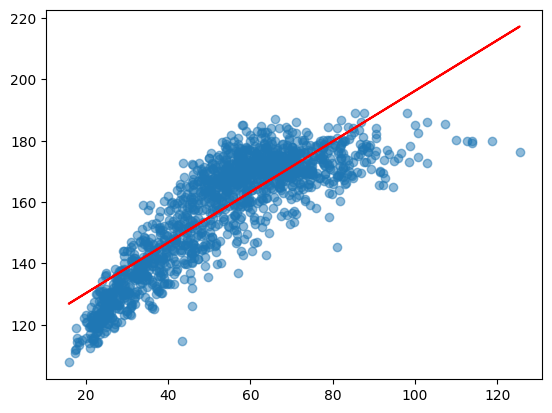

In [36]:
plt.scatter(x_test, y_test["height"], marker="o", alpha=0.5)
plt.plot(x_test, y_test["predict"], color="red")
# 그래프 그릴 땐 plt. 으로 시작
# 그래프 두 개를 한꺼번에 그린것
# marker="o", alpha=0.5) 얘네가 뭐지?